# Executive Questions: Customer Specific Questions

Author: Yue Ling

Year: 2022



# Included Modules and Packages

Code cell containing your includes for modules and packages

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import psycopg2

# Supporting code

Code cells containing any supporting code, such as connecting to the database, any functions, etc.  Remember you can use any code from the labs.

In [2]:
#
# function to run a select query and return rows in a pandas dataframe
# pandas puts all numeric values from postgres to float
# if it will fit in an integer, change it to integer
#

def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)
    

In [3]:
connection = psycopg2.connect(
    user = "postgres",
    password = "ucb",
    host = "postgres",
    port = "5432",
    database = "postgres"
)

In [4]:
cursor = connection.cursor()

# 1.2.1 Total Number of Customers for all of AGM

In [5]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select count(customer_id) as customer_count
from customers

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,customer_count
0,31082


# 1.2.2 Total Number of Customers by Store

Sort by store name in alphabetical order

In [6]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select count(c.customer_id) as customer_count, s.city as store
from customers c
join stores s
on s.store_id = c.closest_store_id 
group by s.city 
order by s.city asc

"""

df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df

,customer_count,store
0,8138,Berkeley
1,6359,Dallas
2,5725,Miami
3,3646,Nashville
4,7214,Seattle


# 1.2.3 Total Number of Customers by Distance from Store

Sort by shortest distance first

In [7]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select count(c.customer_id) as customer_count, distance
from customers c
group by 2
order by 2 asc

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,customer_count,distance
0,2790,1
1,1685,2
2,2417,3
3,2994,4
4,2426,5
5,2478,6
6,2107,7
7,2311,8
8,1906,9
9,1779,10


# 1.2.4 List of Customers who have signed up but not bought anything

Sort by customer last name, then first name

# must use left outer join // include customers not bought anything yet

In [8]:
rollback_before_flag = True
rollback_after_flag = True

#will join with sales, if not bought anything, total_amount would be 0 
query = """

select sum(sa.total_amount) as total_amount, c.last_name, c.first_name
from customers c
left outer join sales sa
on sa.customer_id = c.customer_id 
where sa.total_amount is null
group by 2,3
order by 2,3

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,total_amount,last_name,first_name
0,None,Agott,Tracy
1,None,Arnke,Daniella
2,None,Assandri,Hyacintha
3,None,Borman,Felice
4,None,Breit,Domini
5,None,Butterick,Jacenta
6,None,Camillo,Marysa
7,None,Dukelow,Lilas
8,None,Dukesbury,Corinna
9,None,Ellaway,Lorianna


# 1.2.5 What is the percentage of customers per population at the zip code level?

Sort by highest percentage first

In [9]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select count(*) as customer_count,   (count(*)/z.population)*100 as perc_custPerZip, z.population
from customers c
join zip_codes z
on z.zip = c.zip 
group by z.zip, z.population
order by 2 DESC

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,customer_count,perc_custperzip,population
0,2,1.290323,155
1,6,1.086957,552
2,5,1.052632,475
3,9,1.045296,861
4,8,1.028278,778
...,...,...,...
545,1,0.001718,58224
546,1,0.001482,67487
547,1,0.001433,69802
548,1,0.001041,96081


# 1.2.6 What is the percentage of customers per population at the city level?

Sort by highest percentage first



In [12]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select count(customer_id) as customer_count,   (count (c.customer_id)/ci.population)*100 as perc_custPerCity,
    ci.population, ci.city, ci.state
    
from customers c
join cities ci
    on c.city = ci.city and c.state = ci.state
group by ci.city, ci.state
order by 2 DESC

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,customer_count,perc_custpercity,population,city,state
0,6,1.086957,552,Preston,WA
1,14,1.027146,1363,Indianola,WA
2,7,1.015965,689,Stinson Beach,CA
3,33,1.012270,3260,Medina,WA
4,31,1.009443,3071,Suquamish,WA
...,...,...,...,...,...
193,4,0.002146,186354,Murfreesboro,TN
194,1,0.001762,56764,Wylie,TX
195,1,0.001216,82226,Pleasanton,CA
196,2,0.001160,172448,Frisco,TX


# 1.2.7 Data visualization of the most impactful learning: which store has the most customer

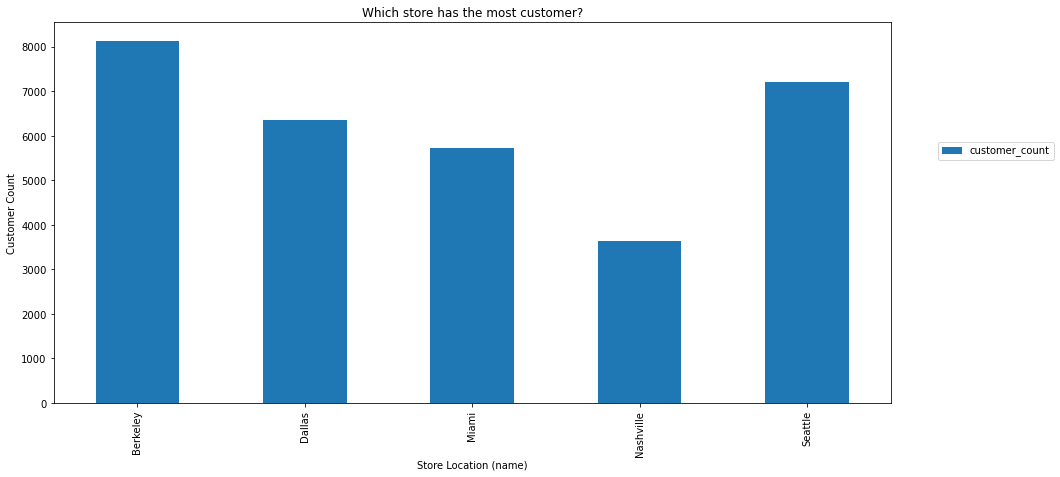

In [11]:
df.plot.bar(figsize=(15,7))

plt.title('Which store has the most customer?')
plt.xlabel('Store Location (name)')
plt.ylabel('Customer Count')

plt.xticks(np.arange(5), labels=df['store'])
plt.legend(bbox_to_anchor=(1.05, 0.7))
plt.show()

